In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# add additional columns like selfemp, insurance, married, ethnicity, education
health_expense_data = pd.read_csv("../data/medical_insurance.csv")
health_expense_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
health_expense_data['age'].max()

64

In [39]:
health_expense_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


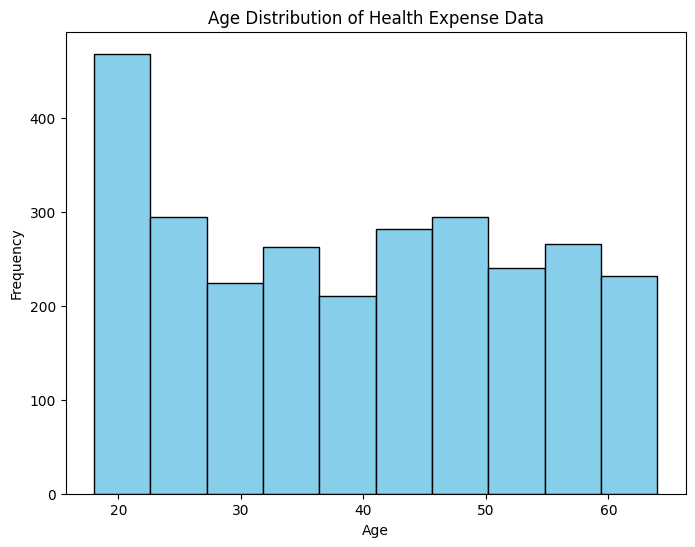

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(health_expense_data["age"], bins=10, color="skyblue", edgecolor="black")
plt.title('Age Distribution of Health Expense Data')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_47786/1588256194.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


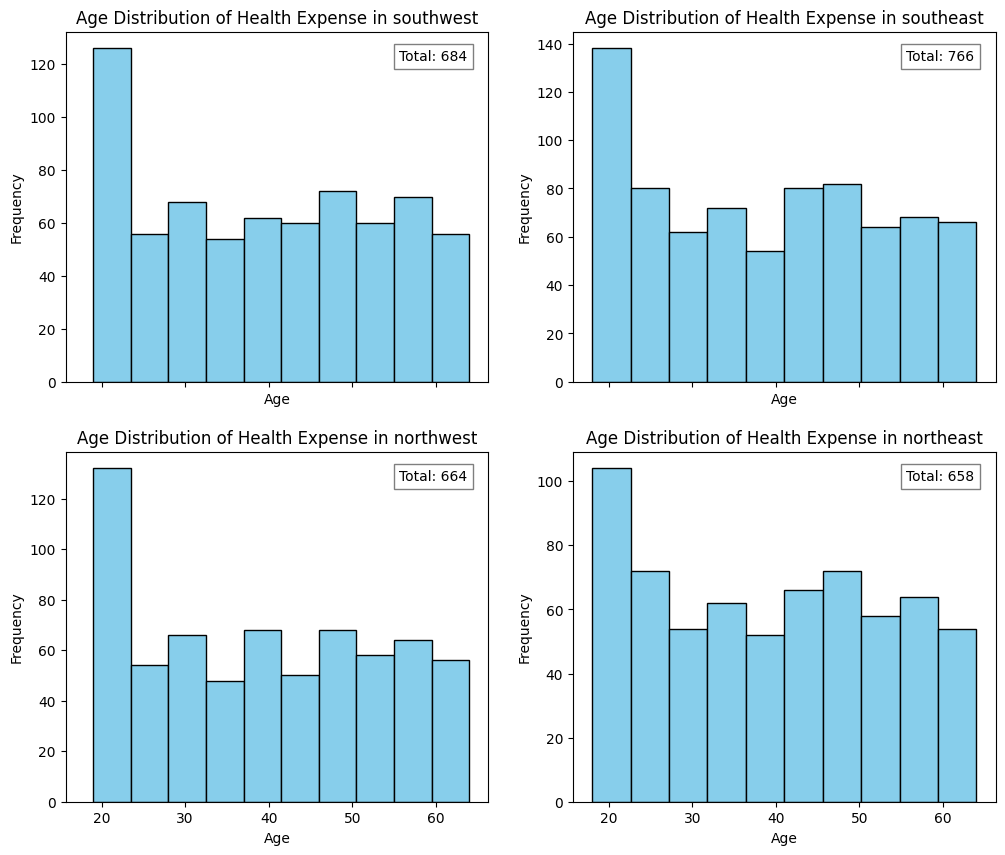

In [12]:
regions = health_expense_data["region"].unique()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharex=True)
axs = axs.flatten()
for i, region in enumerate(regions):
    region_data = health_expense_data[health_expense_data["region"] == region]
    ages = region_data["age"]

    axs[i].hist(ages, bins=10, color="skyblue", edgecolor="black")
    axs[i].set_title(f'Age Distribution of Health Expense in {region}')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Frequency')

    total_people = len(region_data)
    axs[i].text(x=0.95, y=0.95, s=f"Total: {total_people}", horizontalalignment='right', verticalalignment='top',
                transform=axs[i].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

fig.show()

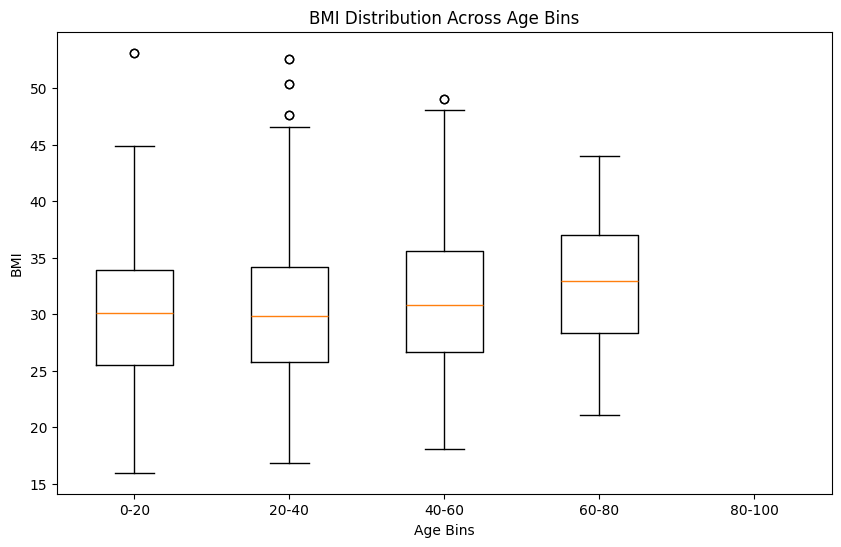

In [15]:
age_bins = [0, 20, 40, 60, 80, 100]

health_expense_data['age_bin'] = pd.cut(health_expense_data['age'], bins=age_bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

plt.figure(figsize=(10, 6))
plt.boxplot([health_expense_data[health_expense_data['age_bin'] == bin]['bmi'] for bin in ['0-20', '20-40', '40-60', '60-80', '80-100']],
            labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

plt.xlabel("Age Bins")
plt.ylabel("BMI")
plt.title("BMI Distribution Across Age Bins")
plt.show()

/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_47786/2920660425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoker_counts = health_expense_data.groupby(['age_bin', 'smoker']).size().unstack(fill_value=0)


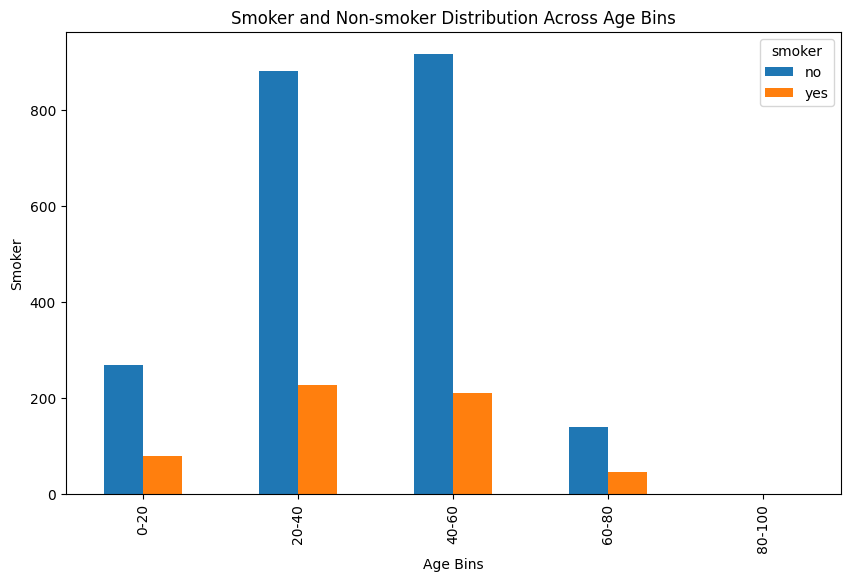

In [20]:
age_bins = [0, 20, 40, 60, 80, 100]

age_smoker_counts = health_expense_data.groupby(['age_bin', 'smoker']).size().unstack(fill_value=0)

age_smoker_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel("Age Bins")
plt.ylabel("Smoker")
plt.title("Smoker and Non-smoker Distribution Across Age Bins")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
health_expense_data.replace({'sex':{'male': 0, 'female':1}}, inplace=True)
health_expense_data.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
health_expense_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)
# health_expense_data = health_expense_data.drop('age_bin', axis=1)
health_expense_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,0,8569.86180
2768,21,1,34.600,0,0,1,2020.17700
2769,19,0,26.030,1,1,3,16450.89470
2770,23,0,18.715,0,0,3,21595.38229


In [43]:
X = health_expense_data.drop('charges', axis=1)
Y = health_expense_data["charges"]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 6) (2217, 6) (555, 6)


In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, Y_train)

LinearRegression()

In [49]:
train_pred = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, train_pred)
r2_train

0.7561940076387632

In [51]:
train_mse = metrics.mean_squared_error(Y_train, train_pred)
train_mse

35385418.71170499

In [53]:
test_pred = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_pred)
print(r2_test)

test_mse = metrics.mean_squared_error(Y_test, test_pred)
print(test_mse)

0.7272408044903713
42928644.97134612


In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, Y_train)

Ridge()

In [68]:
ridge_reg.coef_

array([ 2.60951193e+02, -6.62887750e+00,  3.32698003e+02,  5.48237774e+02,
        2.36004513e+04,  3.14634249e+02])

In [58]:
ridge_train_pred = ridge_reg.predict(X_train)
ridge_r2 = metrics.r2_score(Y_train, ridge_train_pred)
print(ridge_r2)
ridge_train_mse = metrics.mean_squared_error(Y_train, ridge_train_pred)
print(ridge_train_mse)


0.7561891731235433
35386120.38168311


In [60]:
ridge_test_pred = ridge_reg.predict(X_test)
ridge_test_r2 = metrics.r2_score(Y_test, ridge_test_pred)
print(ridge_test_r2)

ridge_test_mse = metrics.mean_squared_error(Y_test, ridge_test_pred)
print(ridge_test_mse)

0.7270138576607741
42964363.363376684


In [61]:
from sklearn.linear_model import Lasso

In [62]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso()

In [66]:
lasso_reg.coef_

array([  260.96965436,    -0.        ,   332.71549044,   547.72312181,
       23660.33359927,   314.66831052])

In [67]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [63]:
lasso_train_pred = lasso_reg.predict(X_train)
lasso_train_r2 = metrics.r2_score(Y_train, lasso_train_pred)
print(lasso_train_r2)

lasso_train_mse = metrics.mean_squared_error(Y_train, lasso_train_pred)
print(lasso_train_mse)

0.7561939470383787
35385427.507099874


In [64]:
lasso_test_pred = lasso_reg.predict(X_test)
lasso_test_r2 = metrics.r2_score(Y_test, lasso_test_pred)
print(lasso_test_r2)

lasso_test_mse = metrics.mean_squared_error(Y_test, lasso_test_pred)
print(lasso_test_mse)

0.7272247698539962
42931168.608398594
